### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

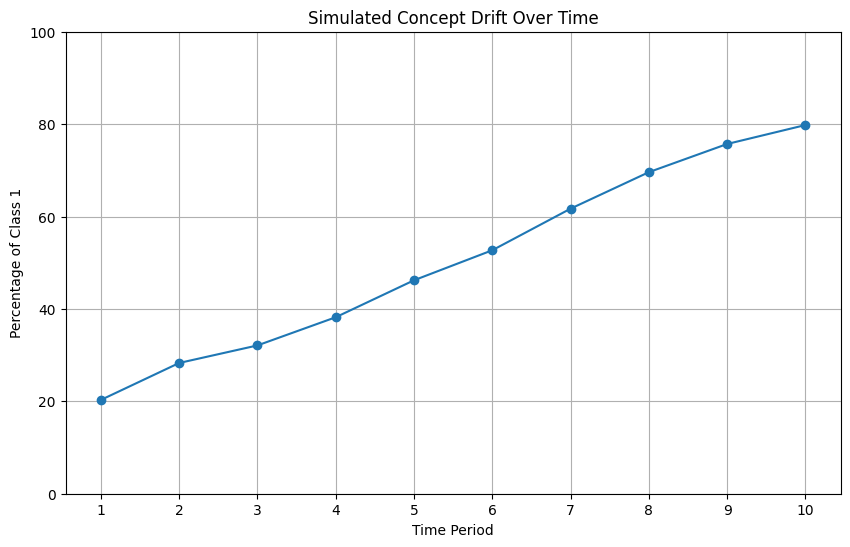

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_concept_drift(time_periods=10, samples_per_period=1000, class_1_range=(0.2, 0.8)):
    """
    Simulates concept drift by gradually changing the distribution of a binary target variable.

    Parameters:
        time_periods (int): Number of time periods to simulate.
        samples_per_period (int): Number of samples in each time period.
        class_1_range (tuple): Start and end probability of class 1.

    Returns:
        pd.DataFrame: DataFrame containing time_period and target columns.
    """
    if not isinstance(samples_per_period, int) or samples_per_period <= 0:
        raise ValueError("samples_per_period must be a positive integer.")
    
    if not isinstance(time_periods, int) or time_periods <= 0:
        raise ValueError("time_periods must be a positive integer.")
    
    try:
        class_1_probs = np.linspace(class_1_range[0], class_1_range[1], time_periods)
        data = []

        for period, prob_1 in enumerate(class_1_probs, start=1):
            target = np.random.choice([0, 1], size=samples_per_period, p=[1 - prob_1, prob_1])
            data.append(pd.DataFrame({'time_period': period, 'target': target}))
        
        return pd.concat(data)
    
    except Exception as e:
        print(f"Error generating concept drift data: {e}")
        return pd.DataFrame()


def plot_concept_drift(drift_df):
    """
    Plots the proportion of class 1 over time to visualize concept drift.

    Parameters:
        drift_df (pd.DataFrame): DataFrame with columns 'time_period' and 'target'.
    """
    try:
        if drift_df.empty:
            raise ValueError("Input dataframe is empty. Cannot plot concept drift.")
        
        summary = drift_df.groupby('time_period')['target'].mean().reset_index()
        summary['target'] *= 100

        plt.figure(figsize=(10, 6))
        plt.plot(summary['time_period'], summary['target'], marker='o')
        plt.title('Simulated Concept Drift Over Time')
        plt.xlabel('Time Period')
        plt.ylabel('Percentage of Class 1')
        plt.xticks(summary['time_period'])
        plt.ylim(0, 100)
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error during plotting: {e}")


if __name__ == "__main__":
    # Run simulation and plot
    drift_df = simulate_concept_drift(time_periods=10, samples_per_period=1000)
    plot_concept_drift(drift_df)
